## Competition description: 

Is there a cat in your dat?

A common task in machine learning pipelines is encoding categorical variables for a given algorithm in a format that allows as much useful signal as possible to be captured.

Because this is such a common task and important skill to master, we've put together a dataset that contains only categorical features, and includes:

binary features
low- and high-cardinality nominal features
low- and high-cardinality ordinal features
(potentially) cyclical features
This Playground competition will give you the opportunity to try different encoding schemes for different algorithms to compare how they perform. We encourage you to share what you find with the community.

If you're not sure how to get started, you can check out the Categorical Variables section of Kaggle's Intermediate Machine Learning course.

Have Fun!

# Intro

Through this kernel,We are going to learn and try some of the most commonly used encoding techniques.As this competition mainly deals with encoding I hope that it would be a great time to refresh some the most common and effective encoding techniques currently in use.
<p><font size="3" color="#6c3483">We will also run and test each of these encoding techniques in a simple logistic regression model and finally observe the performance of each type of encoding.</font></p>

![](https://media.giphy.com/media/H4DjXQXamtTiIuCcRU/giphy.gif)

# Library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#encoding packages

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
import seaborn as sns

In [2]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.model_selection as ms
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import LinearSVC



from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model 
from sklearn import naive_bayes 

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### Knowing our data

In [57]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission.csv')

In [70]:
print('train data has {} row and {} columns'.format(train.shape[0], train.shape[1]))
print('test data has {} row and {} columns'.format(test.shape[0], train.shape[1]) )
print('sample data has {} row and {} columns'.format(sample.shape[0], train.shape[1]) )

train data has 300000 row and 25 columns
test data has 200000 row and 25 columns
sample data has 200000 row and 25 columns


In [10]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [11]:
summary = resumetable(train)
summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
id        300000 non-null int64
bin_0     300000 non-null int64
bin_1     300000 non-null int64
bin_2     300000 non-null int64
bin_3     300000 non-null object
bin_4     300000 non-null object
nom_0     300000 non-null object
nom_1     300000 non-null object
nom_2     300000 non-null object
nom_3     300000 non-null object
nom_4     300000 non-null object
nom_5     300000 non-null object
nom_6     300000 non-null object
nom_7     300000 non-null object
nom_8     300000 non-null object
nom_9     300000 non-null object
ord_0     300000 non-null int64
ord_1     300000 non-null object
ord_2     300000 non-null object
ord_3     300000 non-null object
ord_4     300000 non-null object
ord_5     300000 non-null object
day       300000 non-null int64
month     300000 non-null int64
target    300000 non-null int64
dtypes: int64(8), object(17)
memory usage: 57.2+ MB


There is no NA at all, it's strongly unlikely in real case, but whatever.
Let's define the target and the explicatives variables :

In [7]:
X = train.drop(['target'], axis = 1)
y = train.target

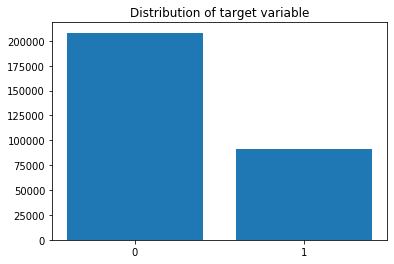

In [19]:
x = y.value_counts()

plt.bar(x.index, x)
plt.gca().set_xticks([0,1])
plt.title('Distribution of target variable')
plt.show;

It seems our data is unbalanced, the modality 0 is two times bigger than the modality 1. It could be problematic, we shall see.

Before getting into encoding,I will just brief you with types data variables present in this data:
- **Binary data** : A  binary variable a variable that has only 2 values : (0,1).
- **Categorical data** : A categorical variable is a variable that can take some limited number of values.for example,day of the week.It can be one of 1,2,3,4,5,6,7 only.
- **Ordinal data** : An ordinal variable is a categorical variable that has some order associated with it.for example,the ratings that are given to a movie by a user.
- **Nominal data** :  Nominal value is a variable that has no numerical importance,such as occupation,person name etc..
- **Timeseries data** : Time series data has a temporal value attached to it, so this would be something like a date or a time stamp that you can look for trends in time.

### Binary features

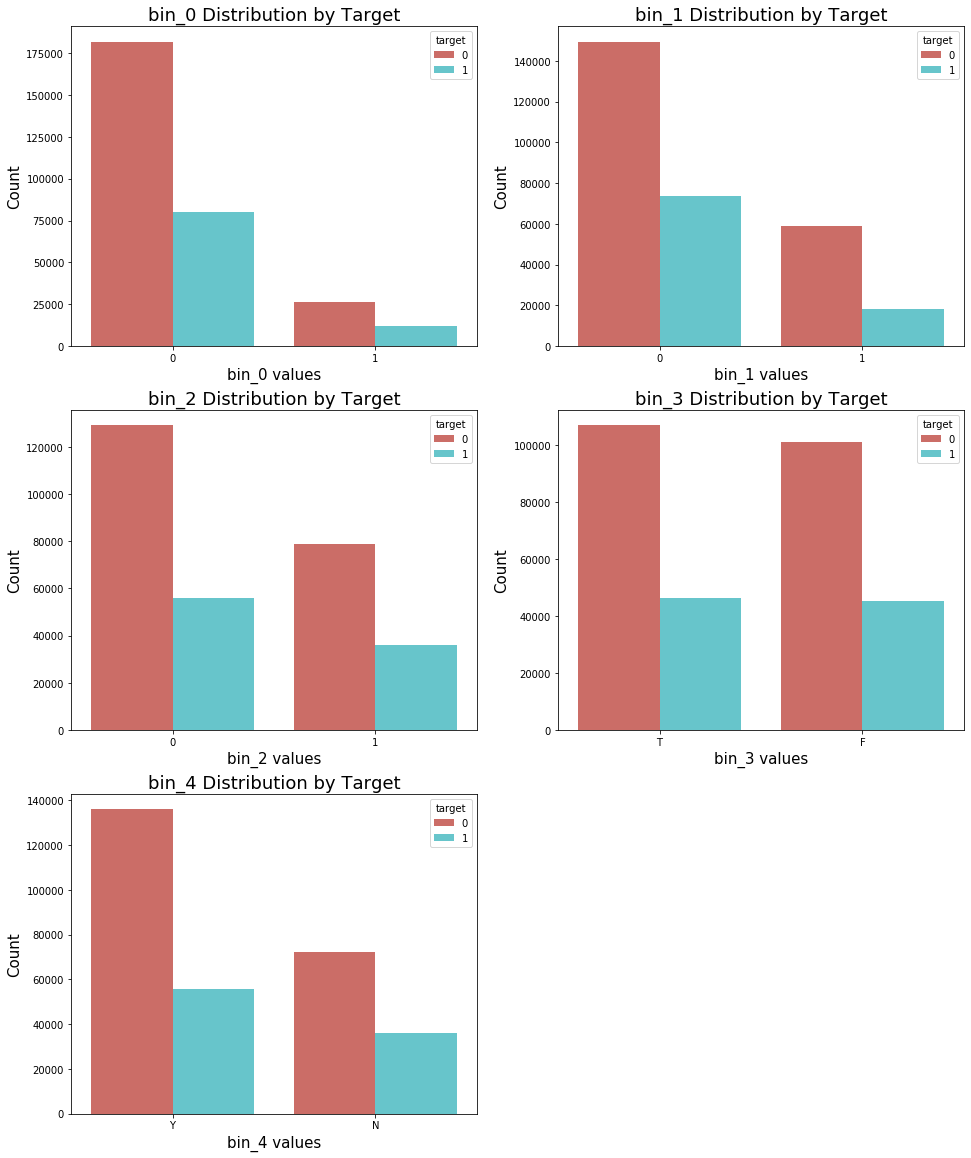

In [14]:
bin_cols = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

#Looking the V's features
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 2) # The grid of chart
plt.figure(figsize=(16,20)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(train[bin_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=train, hue='target', palette='hls') 
    ax.set_ylabel('Count', fontsize=15) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
    ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
    sizes=[] # Get highest values in y

    
plt.show()


We can't see any clear pattern to positive values in target.

- It's interesting to see that in bin_3 the ratio of target true have the same size in both values
- In the other binary features the pattern is very similar.

### Nominal Features (with more than 2 and less than 15 values)

Let's see the distribution of the feature and target Ratio for each value in nominal features

In [15]:
nom_cols = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']

In [20]:
def ploting_cat_fet(df, cols, vis_row=5, vis_col=2):
    
    grid = gridspec.GridSpec(vis_row,vis_col) # The grid of chart
    plt.figure(figsize=(17, 35)) # size of figure

    # loop to get column and the count of plots
    for n, col in enumerate(train[cols]): 
        tmp = pd.crosstab(train[col], train['target'], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=train, order=list(tmp[col].values) , color='green') 
        ax.set_ylabel('Count', fontsize=15) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
        ax.set_xlabel(f'{col} values', fontsize=15) # x axis label

        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
        gt.set_ylabel("Target %True(1)", fontsize=16)
        sizes=[] # Get highest values in y



    plt.subplots_adjust(hspace = 0.5, wspace=.3)
    plt.show()

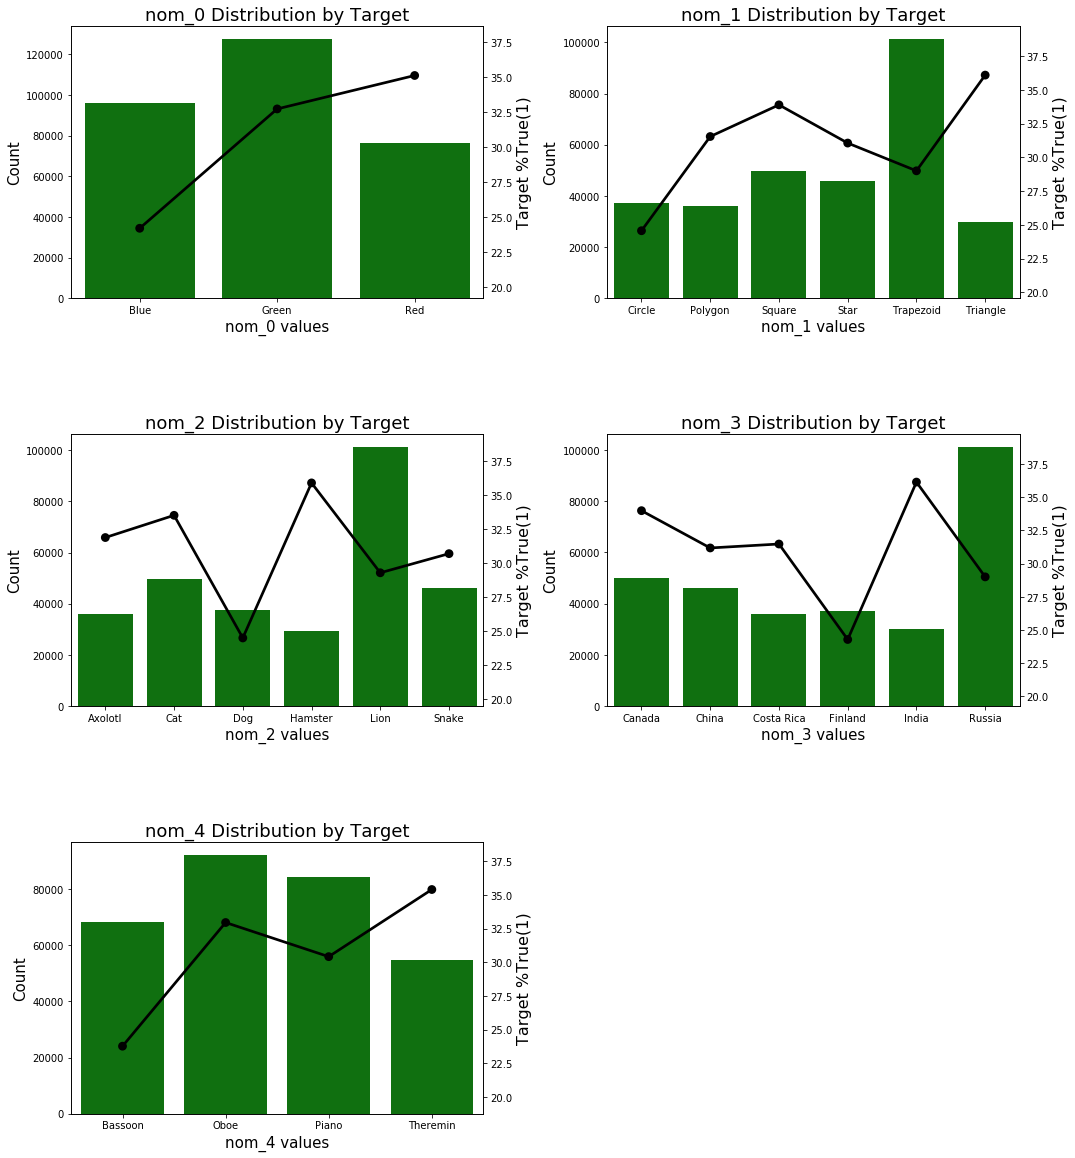

In [21]:
ploting_cat_fet(train, nom_cols, vis_row=5, vis_col=2)

Nice!!! We can see clear different patterns between the nominal category values.

Some summary of these features:

- NOM_0 - Red (~35%) value have the highest % of positive values in the target;

- NOM_1 - Triangle(~36%) value have the highest % of positive values in the target;

- NOM_2 - Hamster(~36%) value have the highest % of positive values in the target;

- NOM_3 - India(~36%) value have the highest % of positive values in the target;

- NOM_4 - Theremin(~36%) value have the highest % of positive values in the target;

Do you noted something?!
All the values with highest % of True values on target, are the category's with lowest frequency on the nominal category's. We need to handle with all these features;
As it is nominal and don't have so many values by category's we can transform it in dummy features;

### Ordinal Features (with more than 2 and less than 15 values)

In [22]:
ord_cols = ['ord_0', 'ord_1', 'ord_2', 'ord_3']

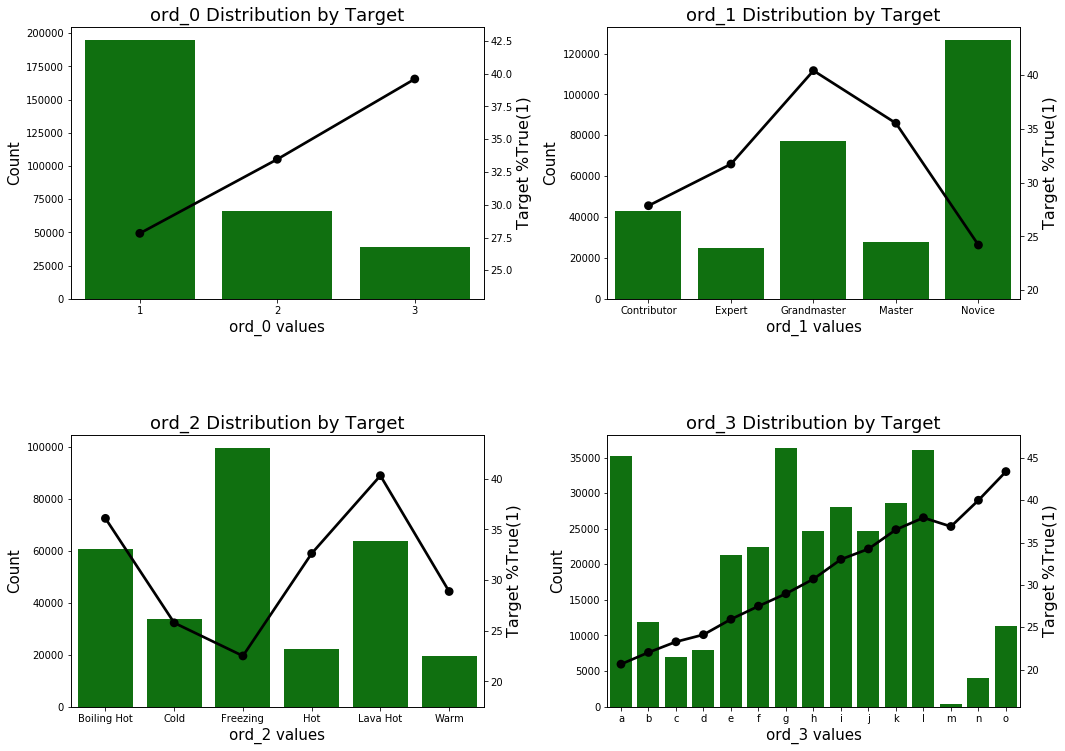

In [24]:
ploting_cat_fet(train, ord_cols, vis_row=5, vis_col=2)

Cool! In Ordinal features, the rule of nominal isn't real.
We can see that only on ord_0 the highest ratio in target in the less common category

*So let's see our first encoding method !*

Like I said, I will use the Logistic Regression for now

![](https://i.imgflip.com/38r5hz.jpg)

## Method 1: Label encoding

With Label encoding, we change each categorical data to a number. Each terms will be substituted by a number.

I give you a example with ord_2 variable :

- Cold will be 1
- Hot will be 2
- Lava Hot will be 3 and so on.

This kind of architecture is much more relevant for machine learning model.

We need **Labelencoder** from sklearn module.

In [21]:
X.dtypes

id        int64
bin_0     int64
bin_1     int64
bin_2     int64
bin_3    object
bin_4    object
nom_0    object
nom_1    object
nom_2    object
nom_3    object
nom_4    object
nom_5    object
nom_6    object
nom_7    object
nom_8    object
nom_9    object
ord_0     int64
ord_1    object
ord_2    object
ord_3    object
ord_4    object
ord_5    object
day       int64
month     int64
dtype: object

We can see that all of our variable who need a encoding with Labelencoder (nominal and ordinal variables) are of the **object** type :

In [26]:
%%time

train=pd.DataFrame()
Label = LabelEncoder()

for c in X.columns:
    if(X[c].dtype == 'object') :
        train[c] = Label.fit_transform(X[c])
    else:
        train[c] = X[c]

train.head(3)

Wall time: 967 ms


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,...,1686,2175,2,2,1,7,3,136,2,2
1,1,0,1,0,1,1,1,4,3,5,...,650,11635,1,2,3,0,0,93,7,8
2,2,0,0,0,0,1,0,4,4,5,...,1932,8078,1,1,4,7,17,31,7,2


Let's resume :

- We initialized our LabelEncoderClass
- We called the fit_transform method to fit and transform all of our variables with object dtype

Let's see if it work :

In [5]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,...,1686,2175,2,2,1,7,3,136,2,2
1,1,0,1,0,1,1,1,4,3,5,...,650,11635,1,2,3,0,0,93,7,8
2,2,0,0,0,0,1,0,4,4,5,...,1932,8078,1,1,4,7,17,31,7,2
3,3,0,1,0,0,1,2,4,5,0,...,629,6056,1,2,0,8,3,134,2,1
4,4,0,0,0,0,0,2,4,4,0,...,1760,8231,1,2,2,0,17,158,7,8


It worked ! Let's see if there is no change in the data shape

In [39]:
train.shape

(300000, 24)

Not at all !

In [8]:
def Logistic(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    Logit = LogisticRegression().fit(X_train, y_train)
    y_pred = Logit.predict(X_test)
    probs = Logit.predict_proba(X_test)
    fpr, tpr, seuils = roc_curve(y_test, probs[:,1])
    roc_auc = auc(fpr,tpr)
    print('The accuracy is :', accuracy_score(y_test, y_pred))
    print()
    print()
    print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
    print()
    print()
    print(classification_report(y_test, y_pred))
    print()
    print()
    print('Score :', Logit.score(X_test, y_test))
    print()
    print('roc AUC', roc_auc)

In [7]:
Logistic(train, y)

C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy is : 0.6886969696969697


Classe prédite      0     1
Classe réelle              
0               66613  2037
1               28782  1568


              precision    recall  f1-score   support

           0       0.70      0.97      0.81     68650
           1       0.43      0.05      0.09     30350

   micro avg       0.69      0.69      0.69     99000
   macro avg       0.57      0.51      0.45     99000
weighted avg       0.62      0.69      0.59     99000



Score : 0.6886969696969697

roc AUC 0.5859113301840269


That's quite bad... My first thought it's because of the unbalance.But that's not the poinr for now, let's focus on each encoding methods.

## Method 2 : One hot encoding

Our second method is encoding each category as a one hot encoding (OHE) vector (or dummy variables). OHE is a representation method that takes each category value and turns it into a binary vector of size |i|(number of values in category i) where all columns are equal to zero besides the category column. Here is a little example:   


![](https://miro.medium.com/max/878/1*WXpoiS7HXRC-uwJPYsy1Dg.png)

To implement on-hot encoding we will use *get_dummies()* function in *pandas*. This function automatically perform only on the right columns, those who need an One hot encoding.

In [ ]:
train=pd.get_dummies(X).astype(np.int8)
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

That's quite long.. Alternatively we can use *OneHotEncoder()* method to convert out data to on-hot encoded data.The advantage of this methos is that is uses very less memory/cpu resourses.
To do that,we need to :
- Import OneHotEncoder from sklean.preprocessing
- Initialize the OneHotEncoder
- Fit and then transform our data

In [7]:
%%time

one = OneHotEncoder()
one.fit(X)
train = one.transform(X)
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 316461 columns
Wall time: 2.22 s


Way more efficient and fast ! Many more columns as we can see (24 to 316461).

Let's try our metrics with this methods :

In [8]:
Logistic(train, y)

C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy is : 0.7584646464646465


Classe prédite      0      1
Classe réelle               
0               60542   8108
1               15804  14546


              precision    recall  f1-score   support

           0       0.79      0.88      0.84     68650
           1       0.64      0.48      0.55     30350

   micro avg       0.76      0.76      0.76     99000
   macro avg       0.72      0.68      0.69     99000
weighted avg       0.75      0.76      0.75     99000



Score : 0.7584646464646465

roc AUC 0.7957048438285552


That's better ! But far from perfect !

## Method 3 : Feature hashing

Feature hashing is a very cool technique to represent categories in a “one hot encoding style” but with a much lower dimensions. In feature hashing we apply a hashing function to the category and then represent it by its indices. for example, if we choose a dimension of 5 to represent “Russia” we will calculate H(Russia) mod 5 = 3 (for example) so Russia representation will be (0,0,1,0,0).

In [33]:
%%time

X_train_hash = X.copy()

for c in X.columns:
    X_train_hash[c] = X[c].astype(str)
hashing = FeatureHasher(input_type = 'string')
train = hashing.transform(X_train_hash.values)

Wall time: 3.82 s


In [34]:
print('train hash has {} row and {} columns'. format(train.shape[0], train.shape[1]))

train hash has 300000 row and 1048576 columns


In [35]:
Logistic(train, y)

The accuracy is : 0.7495555555555555


Classe prédite      0      1
Classe réelle               
0               60380   8270
1               16524  13826


              precision    recall  f1-score   support

           0       0.79      0.88      0.83     68650
           1       0.63      0.46      0.53     30350

   micro avg       0.75      0.75      0.75     99000
   macro avg       0.71      0.67      0.68     99000
weighted avg       0.74      0.75      0.74     99000



Score : 0.7495555555555555

roc AUC 0.7791005667071829


That's slightly worse than One hot encoder but far better than LabelEncoder. Again, far from perfect.

## Methods 4 : Encoding cyclic features

Some of our features are cyclic in nature like day,month etc.

A common method for encoding cyclical data is to transform the data into two dimensions using a *sin* and *cosine* transformation.

In [28]:
%%time

X_train_cyclic=X.copy()
columns=['day','month']
for col in columns:
    X_train_cyclic[col+'_sin']=np.sin((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
    X_train_cyclic[col+'_cos']=np.cos((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
X_train_cyclic=X_train_cyclic.drop(columns,axis=1)

X_train_cyclic[['day_sin','day_cos', 'month_sin', 'month_cos']].head(3)

Wall time: 282 ms


,day_sin,day_cos,month_sin,month_cos
0,9.749279e-01,-0.222521,0.866025,0.5
1,-2.449294e-16,1.000000,-0.866025,-0.5
2,-2.449294e-16,1.000000,0.866025,0.5


Let's one hot encoder other variables :

In [29]:
one = OneHotEncoder()
one.fit(X_train_cyclic)
train = one.transform(X_train_cyclic)

print('train has {} row and {} columns'.format(train.shape[0], train.shape[1]))

train has 300000 row and 316478 columns


In [41]:
Logistic(train,y)

C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy is : 0.7585050505050505


Classe prédite      0      1
Classe réelle               
0               60546   8104
1               15804  14546


              precision    recall  f1-score   support

           0       0.79      0.88      0.84     68650
           1       0.64      0.48      0.55     30350

   micro avg       0.76      0.76      0.76     99000
   macro avg       0.72      0.68      0.69     99000
weighted avg       0.75      0.76      0.75     99000



Score : 0.7585050505050505

roc AUC 0.7956999257269224


That's very similar to the results with just OneHotEncoder, it seems that encoding cyclic feature has been useless.

## Method 5 : Target encoding

Target-based encoding is numerization of categorical variables depending on the target. In this method, we replace the categorical variable with just one new numerical variable and replace each category of the categorical variable with its corresponding probability of the target (if categorical) or average of the target (if numerical). The main drawbacks of this method are its dependency to the distribution of the target, and its lower predictability power compare to the binary encoding method. Let's try anyway.

for example,
<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0</td>
    </tr>
    <tr>
    <td>India</td>
    <td>0</td>
    </tr>
    <tr>
    <td>China</td>
    <td>1</td>
    </tr>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
</table>



Encoding for India = [Number of true targets under the label India/ Total Number of targets under the label India] 
which is 2/3 = 0.66

<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>0.66</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0.5</td>
    </tr>
</table>



In [52]:
%%time

train=pd.read_csv('train.csv')

X_target=train.copy()
X_target['day']=X_target['day'].astype('object')
X_target['month']=X_target['month'].astype('object')
for col in X_target.columns:
    if (X_target[col].dtype=='object'):
        target= dict ( X_target.groupby(col)['target'].agg('sum')/X_target.groupby(col)['target'].agg('count'))
        X_target[col]=X_target[col].replace(target).values
        
    
    

X_target.head(4)

Wall time: 2min 39s


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0.302537,0.290107,0.327145,0.360978,0.307162,0.242813,...,0.368421,2,0.403885,0.257877,0.306993,0.208354,0.401186,0.322048,0.244432,0
1,1,0,1,0,0.302537,0.290107,0.327145,0.290054,0.359209,0.289954,...,0.076923,1,0.403885,0.326315,0.206599,0.186877,0.303880,0.340292,0.327496,0
2,2,0,0,0,0.309384,0.290107,0.241790,0.290054,0.293085,0.289954,...,0.172414,1,0.317175,0.403126,0.306993,0.351864,0.206843,0.340292,0.244432,0
3,3,0,1,0,0.309384,0.290107,0.351052,0.290054,0.307162,0.339793,...,0.227273,1,0.403885,0.360961,0.330148,0.208354,0.355985,0.322048,0.255729,1


In [51]:
Logistic(X_target.drop('target',axis=1),y)

C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy is : 0.6934343434343434


Classe prédite      0
Classe réelle        
0               68650
1               30350


              precision    recall  f1-score   support

           0       0.69      1.00      0.82     68650
           1       0.00      0.00      0.00     30350

   micro avg       0.69      0.69      0.69     99000
   macro avg       0.35      0.50      0.41     99000
weighted avg       0.48      0.69      0.57     99000



Score : 0.6934343434343434

roc AUC 0.5006928207091099


C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


That's not good at all... Let's move on.

# Summary <a id='5'></a>

Here you can see the summary of our model performance against each of the encoding techniques we have used.
It is clear that OnHotEncoder together with cyclic feature encoding yielded maximum accuracy.


<table style="width : 50%">
    <tr>
    <th>Encoding</th>
    <th>Score</th>
    <th>Roc AUC</th>
    <th>Wall time</th>
    </tr>
    <tr>
    <td>Label Encoding</td>
    <td>0.688</td>
    <td>0.585</td>
    <td>1.01 s</td>
    </tr>
    <tr>
    <td>OnHotEncoder</td>
    <td>0.758</td>
    <td>0.795</td>
    <td>2.22 s</td>
    </tr>
    <tr>
    <td>Feature Hashing</td>
    <td>0.749</td>
    <td>0.779</td>
    <td>3.82 s</td>
    </tr>
    </tr>
    <tr>
    <td>Cyclic + OnHotEncoding</td>
    <td>0.758</td>
    <td>0.795</td>
    <td>265 ms</td>
    </tr>
    </tr>
    <tr>
    <td>Target encoding</td>
    <td>0.693</td>
    <td>0.5</td>
    <td>2min 39s</td>
    </tr>
    
</table>

Here you can see the summary of our model performance against each of the encoding techniques we have used.
OnHotEncoder and cyclic feature encoding yielded maximum accuracy and maximum AUC.

Just in case, let's see if Logistic Regresssion was the best bet :

In [10]:
KFold = StratifiedKFold(n_splits=3, random_state=42)
scores = {}

def score_model(model):
    return cross_val_score(model, train, y, scoring='roc_auc', cv = KFold)

#.todense()


# time: 10s
scores['tree'] = score_model(tree.DecisionTreeClassifier())

# time: 9s
scores['extra_tree'] = score_model(ensemble.ExtraTreesClassifier())

# time: 7s
scores['forest'] = score_model(ensemble.RandomForestClassifier())

# time: 33s
scores['ada_boost'] = score_model(ensemble.AdaBoostClassifier())

# time: 1min
scores['bagging'] = score_model(ensemble.BaggingClassifier())

# time: 2min30s
scores['grad_boost'] = score_model(ensemble.GradientBoostingClassifier())

# time: 49s
scores['ridge'] = score_model(linear_model.RidgeClassifier())

# time: 4s
scores['passive'] = score_model(linear_model.PassiveAggressiveClassifier())

# time: 4s
scores['sgd'] = score_model(linear_model.SGDClassifier())

# time: 3s
#scores['gaussian'] = score_model(naive_bayes.GaussianNB())

# time: 4min
scores['xgboost'] = score_model(xgb.XGBClassifier())

scores['LightGBM'] = score_model(LGBMClassifier())

scores['LinearSVC'] = score_model(LinearSVC())

scores['LR'] = score_model(LogisticRegression())

In [11]:
# Print the scores (with undersampling and 50k data)
model_scores = pd.DataFrame(scores).mean()
model_scores = model_scores.sort_values(ascending=False)
#model_scores.to_csv('model_scores.csv', index=False)
print('Model scores\n{}'.format(model_scores))

Model scores
LR            0.795574
LinearSVC     0.787192
ridge         0.787180
sgd           0.787161
LightGBM      0.758381
ada_boost     0.733590
grad_boost    0.727606
passive       0.727055
xgboost       0.726703
bagging       0.675271
extra_tree    0.626520
forest        0.624351
tree          0.573840
dtype: float64


It was ! Perfect, it seems our intuition was well founded.